In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
import libsvm_data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score

In [2]:
y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')

252
Acc:  0.5942028985507246
Bal_Acc:  0.5
True Positive (TP):  0
True Negative (TN):  82
False Positive (FP):  0
False Negative (FN):  56


Metrics:
Accuracy:  0.59
Precision:  nan
Recall:  0.0
F1-score:  nan


<ipython-input-16-e2b420ffe5fe>:69: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


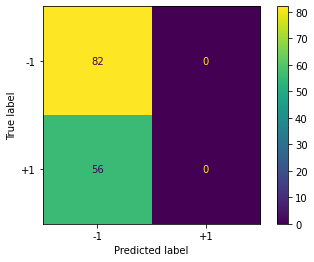

In [16]:
# Winnow Binary Elimination
y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')
x_new = np.copy(np.array(X))
X = np.ones(x_new.shape)
for i in range(x_new.shape[1]):
    mean = x_new.mean(axis=0)[i]
    for j in range(x_new.shape[0]):
        if(x_new[j][i]>mean):
            X[j][i] = 1
        else:
            X[j][i] = 0
X = np.array(X)


# Reading the data from the file and storing it in a variable
update_count = 0
flag = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
weights = np.ones(X_train.shape[1])
alpha = 2
theta = X_train.shape[1]
for itr in range(20):
    for i in range(X_train.shape[0]):
        if(weights.dot(X_train[i]) > theta):
            pred = 1
        else:
            pred = -1
        resp = y_train[i]
#         print(pred, resp)
        if(pred != resp):
            update_count += 1
            if(resp == -1 and pred == 1):
                for j in range(X_train.shape[1]):
                    if (X_train[i,j] == 1.0):
                        weights[j] = 0
            elif(resp == 1 and pred == -1):
                for j in range(X_train.shape[1]):
                    if (X_train[i,j] == 1.0):
                        weights[j] *= alpha
    if(flag == 0):
        print(update_count)
        flag = 1
#             print(X_train[j],"-",weights)
y_pred = []
for i in range(len(y_test)):
    if(weights.dot(X_test[i]) > theta):
            y_pred.append(1)
    else:
            y_pred.append(-1)
print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

120
Acc:  0.7608695652173914
Bal_Acc:  0.7890086206896552
True Positive (TP):  56
True Negative (TN):  49
False Positive (FP):  31
False Negative (FN):  2


Metrics:
Accuracy:  0.76
Precision:  0.64
Recall:  0.97
F1-score:  0.77


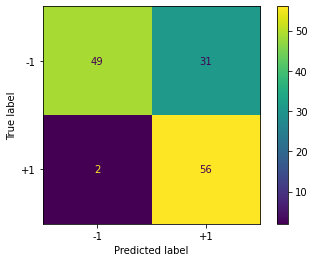

In [8]:
# Winnow Binary Demotion

y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')
x_new = np.copy(np.array(X))
X = np.ones(x_new.shape)
for i in range(x_new.shape[1]):
    mean = x_new.mean(axis=0)[i]
    for j in range(x_new.shape[0]):
        if(x_new[j][i]>mean):
            X[j][i] = 1
        else:
            X[j][i] = -1
X = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)
update_count = 0
flag = 0
weights = np.ones(X_train.shape[1])
alpha = 2.5
theta = X_train.shape[1]/2
for itr in range(20):
    for i in range(X_train.shape[0]):
        if(weights.dot(X_train[i]) > theta):
            pred = 1
        else:
            pred = -1
        resp = y_train[i]
#         print(pred, resp)
        if(pred != resp):
            update_count += 1
            if(resp == -1 and pred == 1):
                for j in range(X_train.shape[1]):
                    if (X_train[i,j] == 1.0):
                        weights[j] = weights[j]/alpha
            elif(resp == 1 and pred == -1):
                for j in range(X_train.shape[1]):
                    if (X_train[i,j] == 1.0):
                        weights[j] *= alpha
    if(flag == 0):
        print(update_count)
        flag = 1
        
#             print(X_train[j],"-",weights)
y_pred = []
for i in range(len(y_test)):
    if(weights.dot(X_test[i]) > theta):
            y_pred.append(1)
    else:
            y_pred.append(-1)
            
            
print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))
# print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
# print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# fig, ax = plt.subplots(figsize=(7.5, 7.5))
# ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# plt.show()

235


<ipython-input-9-99f42039105e>:33: RuntimeWarning: overflow encountered in double_scalars
  weights[j] *= alpha


Acc:  0.5579710144927537
Bal_Acc:  0.5080645161290323
True Positive (TP):  1
True Negative (TN):  76
False Positive (FP):  0
False Negative (FN):  61


Metrics:
Accuracy:  0.56
Precision:  1.0
Recall:  0.02
F1-score:  0.03


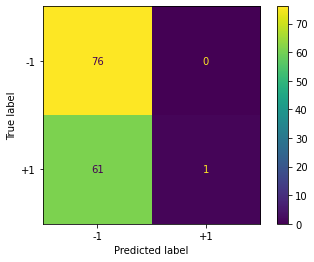

In [9]:
# Winnow on Real Data Elimination


# Reading the data from the file and storing it in a variable
y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')
update_count = 0
flag = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
update_count = 0
flag = 0
weights = np.ones(X_train.shape[1])
alpha = 2
theta = X_train.shape[1]
for itr in range(20):
    for i in range(X_train.shape[0]):
        if(weights.dot(X_train[i]) > theta):
            pred = 1
        else:
            pred = -1
        resp = y_train[i]
#         print(pred, resp)
        if(pred != resp):
            update_count += 1
            if(resp == -1 and pred == 1):
                for j in range(X_train.shape[1]):
                    train_mean = X_train.mean(axis=0)[j]
                    if (X_train[i,j] >= train_mean):
                        weights[j] = 0
            elif(resp == 1 and pred == -1):
                for j in range(X_train.shape[1]):
                    train_mean = X_train.mean(axis=0)[j]
                    if (X_train[i,j] >= train_mean):
                        weights[j] *= alpha
    if(flag == 0):
        print(update_count)
        flag = 1
y_pred = []
for i in range(len(y_test)):
    if(weights.dot(X_test[i]) > theta):
            y_pred.append(1)
    else:
            y_pred.append(-1)

print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

142
Acc:  0.782608695652174
Bal_Acc:  0.7887630662020906
True Positive (TP):  46
True Negative (TN):  62
False Positive (FP):  20
False Negative (FN):  10


Metrics:
Accuracy:  0.78
Precision:  0.7
Recall:  0.82
F1-score:  0.75


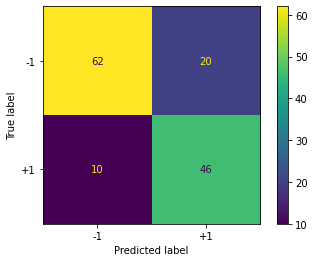

In [10]:
# Winnow Real Data Demotion Proposed

# Reading the data from the file and storing it in a variable
y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
flag = 0
update_count = 0
weights = np.ones(X_train.shape[1])
alpha = 2
theta = X_train.shape[1]/2
for itr in range(20):
    for i in range(X_train.shape[0]):
        if(weights.dot(X_train[i]) > theta):
            pred = 1
        else:
            pred = -1
        resp = y_train[i]
#         print(pred, resp)
        if(pred != resp):
            update_count += 1
            if(resp == -1 and pred == 1):
                for j in range(X_train.shape[1]):
                    train_mean = X_train.mean(axis=0)[j]
                    if (X_train[i,j] >= train_mean):
                        weights[j] = (weights[j]* X_train[i,j])/alpha
            elif(resp == 1 and pred == -1):
                for j in range(X_train.shape[1]):
                    train_mean = X_train.mean(axis=0)[j]
                    if (X_train[i,j] >= train_mean):
                        weights[j] = (weights[j]* X_train[i,j]) * alpha
    if(flag == 0):
        print(update_count)
        flag = 1
y_pred = []
for i in range(len(y_test)):
    if(weights.dot(X_test[i]) > theta):
            y_pred.append(1)
    else:
            y_pred.append(-1)
print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

136
Acc:  0.8478260869565217
Bal_Acc:  0.8338512763596004
True Positive (TP):  41
True Negative (TN):  76
False Positive (FP):  9
False Negative (FN):  12


Formulas:
Accuracy: (TP + TN) / (TP + TN + FP + FN)
Precision: TP / (TP + FP)
Recall: TP / (TP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Metrics:
Accuracy:  0.85
Precision:  0.82
Recall:  0.77
F1-score:  0.8


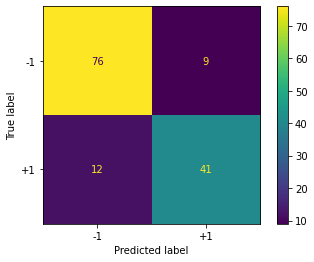

In [6]:
# Winnow Real Data Normalized Demotion Proposed

# Reading the data from the file and storing it in a variable
y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
update_count = 0
flag = 0
weights = np.ones(X_train.shape[1])
alpha = 2
theta = X_train.shape[1]
for itr in range(1):
    for i in range(X_train.shape[0]):
        if(weights.dot(X_train[i]) > theta):
            pred = 1
        else:
            pred = -1
        resp = y_train[i]
#         print(pred, resp)
        if(pred != resp):
            update_count += 1
            if(resp == -1 and pred == 1):
                for j in range(X_train.shape[1]):
                    train_mean = np.median(X_train, axis = 0)[j]
                    if (X_train[i,j] >= train_mean):
                        weights[j] = (weights[j]* X_train[i,j])/alpha
            elif(resp == 1 and pred == -1):
                for j in range(X_train.shape[1]):
                    train_mean = np.median(X_train, axis = 0)[j]
                    if (X_train[i,j] >= train_mean):
                        weights[j] = (weights[j]* X_train[i,j]) * alpha
    if(flag == 0):
        print(update_count)
        flag = 1
        y_pred = []
        for i in range(len(y_test)):
            if(weights.dot(X_test[i]) > theta):
                    y_pred.append(1)
            else:
                    y_pred.append(-1)
print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

170
Acc:  0.6956521739130435
Bal_Acc:  0.720976692563818
True Positive (TP):  44
True Negative (TN):  52
False Positive (FP):  33
False Negative (FN):  9


Metrics:
Accuracy:  0.7
Precision:  0.57
Recall:  0.83
F1-score:  0.68


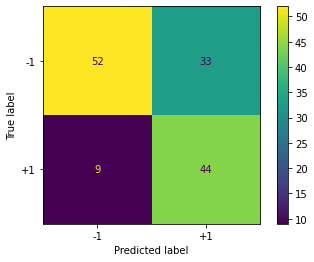

In [11]:
# Exponential Winnow Real Data Normalized Demotion

# Reading the data from the file and storing it in a variable

y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
update_count = 0
flag = 0
weights = np.ones(X_train.shape[1])/X_train.shape[0]
theta = X_train.shape[1]

for itr in range(1):
    for i in range(X_train.shape[0]):
        if(weights.dot(X_train[i]) > theta):
            pred = 1
        else:
            pred = -1
        resp = y_train[i]
#         print(pred, resp)
        if(pred != resp):
            update_count += 1
            for j in range(X_train.shape[1]):
                if(X_train.sum(axis=0)[j]!=0):
                    weights[j] = (weights[j]/X_train.sum(axis=0)[j])*np.exp(theta * resp * X_train[i,j])
#                     weights[j] = (weights[j]*np.exp(theta * resp * X_train[i,j]))/X_train.sum(axis=0)[j]
    if(flag == 0):
        print(update_count)
        flag = 1
y_pred = []
for i in range(len(y_test)):
    if(weights.dot(X_test[i]) > theta):
            y_pred.append(1)
    else:
            y_pred.append(-1)

print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

139
Acc:  0.6376811594202898
Bal_Acc:  0.6413412563667232
True Positive (TP):  42
True Negative (TN):  46
False Positive (FP):  30
False Negative (FN):  20


Metrics:
Accuracy:  0.64
Precision:  0.58
Recall:  0.68
F1-score:  0.63


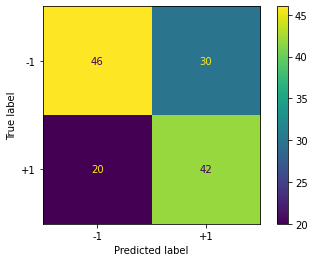

In [12]:
# Exponential Winnow Real Data 

# Reading the data from the file and storing it in a variable
y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
update_count = 0
flag = 0
weights = np.ones(X_train.shape[1])/X_train.shape[0]
theta = X_train.shape[1]

for itr in range(20):
    for i in range(X_train.shape[0]):
        if(weights.dot(X_train[i]) > theta):
            pred = 1
        else:
            pred = -1
        resp = y_train[i]
#         print(pred, resp)
        if(pred != resp):
            update_count += 1
            for j in range(X_train.shape[1]):
                if(X_train.sum(axis=0)[j]!=0):
                    weights[j] = (weights[j]/X_train.sum(axis=0)[j])*np.exp(theta * resp * X_train[i,j])
#                     weights[j] = (weights[j]*np.exp(theta * resp * X_train[i,j]))/X_train.sum(axis=0)[j]
    if(flag == 0):
        print(update_count)
        flag = 1
y_pred = []
for i in range(len(y_test)):
    if(weights.dot(X_test[i]) > theta):
            y_pred.append(1)
    else:
            y_pred.append(-1)

print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

117
Acc:  0.782608695652174
Bal_Acc:  0.7951858108108107
True Positive (TP):  62
True Negative (TN):  46
False Positive (FP):  28
False Negative (FN):  2


Metrics:
Accuracy:  0.78
Precision:  0.69
Recall:  0.97
F1-score:  0.81


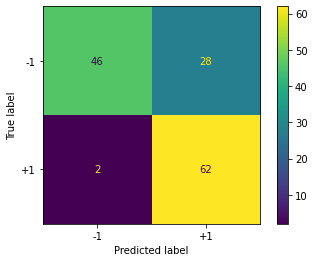

In [13]:
# Reparameterized Winnow

# Reading the data from the file and storing it in a variable
y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
update_count = 0
def elem_mult(x, y):
    z = np.ones(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = x[i]*y[i]
    return z

def elm_elm_mul(w1, w2, x):
    u = 0
    z = elem_mult(w1,w2)
    for i in range(z.shape[0]):
            u += z[i]*x[i]
    return u

        

weights = np.ones(X_train.shape[1])/X_train.shape[0]
eta = 2.5
for i in range(X_train.shape[0]):
    theta = X_train.mean(axis=1)[i]
    if(elm_elm_mul(weights, weights, X_train[i]) >= theta):
        pred = 1
    else:
        pred = -1
    resp = y_train[i]
    vec = np.ones(X_train.shape[1])
    if(pred != resp):
        update_count += 1
        weights = weights + eta*resp*elem_mult(weights, X_train[i]) 
            
y_pred = []
for i in range(len(y_test)):
    theta = X_test.mean(axis=1)[i]
    if(weights.dot(X_test[i]) > theta):
            y_pred.append(1)
    else:
            y_pred.append(-1)
print(update_count)
print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))    

255
Acc:  0.6304347826086957
Bal_Acc:  0.5
True Positive (TP):  0
True Negative (TN):  87
False Positive (FP):  0
False Negative (FN):  51


Metrics:
Accuracy:  0.63
Precision:  nan
Recall:  0.0
F1-score:  nan


<ipython-input-14-a38ca5abae1d>:27: RuntimeWarning: overflow encountered in double_scalars
  a = (alpha**-X_train[i,j])*weights[j]
<ipython-input-14-a38ca5abae1d>:60: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


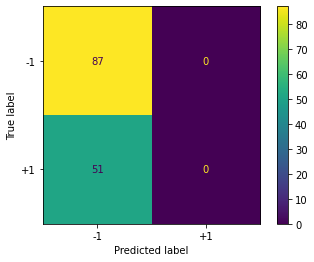

In [14]:
# Mesterharm Winnow

# Reading the data from the file and storing it in a variable
y, X, n = libsvm_data.get_data_libsvm('australian_scale.txt')

update_count = 0
flag = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
weights = np.ones(X_train.shape[1])
alpha = 2
epsilon = 0.5
for itr in range(20):
    for i in range(X_train.shape[0]):
        w = np.copy(weights)
        if(weights.dot(X_train[i]) > 1):
            pred = 1
        else:
            pred = -1
        resp = y_train[i]
#         print(pred, resp)
        if(pred != resp):
            update_count += 1
            if(pred == 1):
                weights = np.power(alpha,X_train[i])*weights
            elif(pred == -1):
                for j in range(X_train.shape[1]):
                    a = (alpha**-X_train[i,j])*weights[j]
                    w[j] = np.maximum(epsilon, a)
        weights = np.copy(w)
                    
    if(flag == 0):
        print(update_count)
        flag = 1
#             print(X_train[j],"-",weights)
y_pred = []
for i in range(len(y_test)):
    if(weights.dot(X_test[i]) > 1):
            y_pred.append(1)
    else:
            y_pred.append(-1)
print("Acc: ",accuracy_score(y_test, y_pred, normalize=True))
print("Bal_Acc: ", balanced_accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['-1','+1'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate recall
recall = tp / (tp + fn)
 
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))